### Цель работы:
Изучение алгоритмов и методов регрессии на практике.
### **Вариант 5**


### Импорт основных библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_var5 = pd.read_excel('../data/regression.xlsx', sheet_name='var5')

### **Часть 1 - Простая линейная регрессия**

Обучить модель простой (парной) линейной регрессии, используя для обучения значения ```x1``` и ```y```, а затем ```x2``` и ```y```.

**1.1 В данном фрагменте кода последовательно строятся две модели простой линейной регрессии.**

Для обучения моделей были выполнены следующие шаги:
1) Из исходного набора данных были выделены независимые переменные ```x1``` и ```x2``` (признаки), а также зависимая переменная ```y``` (цель моделирования).
2) Для каждого признака (```x1``` и ```x2```) была создана отдельная модель линейной регрессии ```LinearRegression()```.
3) Каждая модель была обучена на своих данных с использованием метода ```.fit()```, что позволило определить коэффициенты и получить уравнение линейной зависимости между соответствующим признаком и целевой переменной ```y```.

In [2]:
x1 = df_var5[['x1']]
y = df_var5['y']

model_x1 = LinearRegression()
model_x1.fit(x1, y)

x2 = df_var5[['x2']]

model_x2 = LinearRegression()
model_x2.fit(x2, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**1.2 Далее была использована обученная модель, чтобы получить предсказания целевой переменной (необходимо для оценки точности моделей).**

```model_x1.predict(x1)``` - модель, обученная на признаке ```x1```, вычисляет прогнозируемые значения ```y``` для тех же входных данных ```x1```. Результат сохраняется в переменной ```y_pred_x1```.

```model_x2.predict(x2)``` - аналогично, вторая модель, обученная на признаке ```x2```, генерирует предсказанные значения ```y``` на основе входных значений ```x2```. Результат сохраняется в переменной ```y_pred_x2```.

In [3]:
y_pred_x1 = model_x1.predict(x1)
y_pred_x2 = model_x2.predict(x2)

**1.3 Была сформирована таблица с результатами предсказаний моделей.**

Где:
```Actual``` - фактические значения целевой переменной ```y```;
```Predicted_x1``` - значения, предсказанные первой моделью (построенной по признаку ```x1```);
```Predicted_x2``` — значения, предсказанные второй моделью (по признаку ```x2```).

In [4]:
df_results = pd.DataFrame({
    'Actual': y,
    'Predicted_x1': y_pred_x1,
    'Predicted_x2': y_pred_x2})

display(df_results.head())
display(df_results.tail())

,Actual,Predicted_x1,Predicted_x2
0,0.933986,0.182727,1.360142
1,-0.590249,0.185310,-0.435791
2,-1.067998,0.205476,-0.630202
3,1.975436,0.208550,1.432693
4,-0.264838,0.149103,-0.159917


,Actual,Predicted_x1,Predicted_x2
995,1.602534,0.101754,1.155217
996,-0.794697,0.109248,0.255740
997,1.608596,0.104798,1.406345
998,-0.115589,0.180779,-0.638995
999,-0.034714,0.126086,-0.460284


Данные результаты показывают, что
Ни одна из моделей не предсказывает значения идеально: как для признака ```x1```, так и для ```x2``` предсказанные значения заметно отличаются от фактических значений ```Actual``` для части наблюдений.
Есть строки, где модель по ```x1``` даёт прогноз ближе к реальному значению, чем модель по ```x2```, а есть и обратные ситуации, когда именно модель по ```x2``` оказывается точнее.
В некоторых случаях одна из моделей может даже предсказать значение с противоположным знаком относительно фактического. Это говорит о том, что линейная зависимость по одному признаку выражена слабо, а влияние шума и других факторов остаётся заметным.
Для отдельных наблюдений обе модели дают значимый промах по сравнению с фактическим значением, что ещё раз подчёркивает: ни ```x1```, ни ```x2``` в одиночку полностью не объясняют поведение целевой переменной.
Признаки ```x1``` и ```x2``` по-разному описывают связь с ```y```, поэтому модели, построенные на их основе, реагируют на данные по-разному, и их предсказания для одних и тех же строк могут сильно отличаться друг от друга.


**1.4 Были подсчитаны и выведены в консоль метрики качества регрессии (MSE, MAE, RMSE, R2) для каждой модели.**

In [5]:
mse_x1 = mean_squared_error(y, y_pred_x1)
mae_x1 = mean_absolute_error(y, y_pred_x1)
rmse_x1 = np.sqrt(mse_x1)
r2_x1 = r2_score(y, y_pred_x1)

mse_x2 = mean_squared_error(y, y_pred_x2)
mae_x2 = mean_absolute_error(y, y_pred_x2)
rmse_x2 = np.sqrt(mse_x2)
r2_x2 = r2_score(y, y_pred_x2)

print("Метрики модели по x1")
print("MSE:", round(mse_x1, 5))
print("MAE:", round(mae_x1, 5))
print("RMSE:", round(rmse_x1, 5))
print("R2:", round(r2_x1, 5))

print("\nМетрики модели по x2")
print("MSE:", round(mse_x2, 5))
print("MAE:", round(mae_x2, 5))
print("RMSE:", round(rmse_x2, 5))
print("R2:", round(r2_x2, 5))

Метрики модели по x1
MSE: 0.91258
MAE: 0.79476
RMSE: 0.95529
R2: 0.00254

Метрики модели по x2
MSE: 0.26344
MAE: 0.3927
RMSE: 0.51327
R2: 0.71205


**MSE (Mean Squared Error)** - среднеквадратичная ошибка - показывает, насколько в среднем модель ошибается. Чем меньше MSE - тем лучше модель.\
**MAE (Mean Absolute Error)** - средняя абсолютная ошибка - это «средняя ошибка» в тех же единицах, что и целевая переменная. Чем меньше, тем лучше.\
**RMSE (Root Mean Squared Error)** - корень из MSE - тоже показывает ошибку, но учитывает сильные отклонения. Показатель в том же масштабе, что и целевая переменная (как MAE). Чем меньше - тем лучше.\
**R2 (коэффициент детерминации)** - показывает, насколько хорошо модель объясняет данные. 1 = идеальная модель, 0 = модель никак не помогает. Чем ближе к 1 - тем лучше.

Результаты:
MSE: у модели 1 - 1.89571, у модели 2 - 2.09033. Модель 1 ошибается меньше, чем по модель 2.
MAE: у модели 1 - 1.14894, у модели 2 - 1.10044. В среднем, предсказание модели 2 отклоняется от истинного значения, чуть меньше чем модель 1.
RMSE: у модели 1 - 1.37685, у модели 2 - 1.44580. Это квадратный корень из MSE. У модели 1 редкие большие ошибки существуют, но не критично, а у модели 2 больше крупных ошибок, чем у первой.
R2 модели 1: 0.42827. Это значение ближе к 0, чем к 1, поэтому модель объясняет только 42.83% изменчивости переменной ```y```. Такой результат говорит о том, что связь между ```x1``` и ```y``` существует, но не является сильной. Модель улавливает часть зависимости, но большая доля вариации остаётся необъяснённой - возможно, на ```y``` влияют другие признаки.
R2 модели 2: 0.36957. Модель объясняет 36.96% изменчивости ```y```, что хуже, чем у модели по ```x1```. Это тоже невысокий результат, указывающий на слабую линейную связь между ```x2``` и ```y```. Модель не способна точно предсказывать значение y только по этому признаку.
Модель с признаком ```x1``` работает лучше, чем модель с признаком ```x2```. Она точнее по ключевым метрикам и лучше описывает зависимость между признаком и целевой переменной. Однако обе модели показывают не очень высокое качество прогноза, следовательно, для более точного результата необходимо использовать дополнительные признаки или более сложные модели.

**1.5 Вывод значений коэффициентов a и b.**

In [6]:
print("Коэффициенты модели по x1:")
print("a =", round(model_x1.coef_[0], 5))
print("b =", round(model_x1.intercept_, 5))

print("\nКоэффициенты модели по x2:")
print("a =", round(model_x2.coef_[0], 5))
print("b =", round(model_x2.intercept_, 5))

Коэффициенты модели по x1:
a = 0.04175
b = 0.13147

Коэффициенты модели по x2:
a = 0.69905
b = 0.13145


Для модели с признаком ```x1``` коэффициент ```a = 0.04175``` показывает, что при увеличении ```x1``` на 1 единицу целевая переменная ```y``` в среднем изменяется примерно на 0.04175. Свободный член ```b = 0.13147``` означает, что при ```x1 = 0``` прогнозируемое значение ```y``` равно примерно 0.13147.

Для модели с признаком ```x2``` коэффициент ```a = 0.69905``` существенно больше по модулю. Это значит, что при увеличении ```x2``` на 1 единицу модель ожидает изменение ```y``` примерно на 0.69905. Свободный член ```b = 0.13145``` практически совпадает с таковым в первой модели, то есть при ```x2 = 0``` модель предсказывает ```y ≈ 0.13145```.

Таким образом, признак ```x2``` оказывает значительно более сильное линейное влияние на целевую переменную по сравнению с ```x1```, что согласуется с последующим сравнением метрик качества моделей.


**1.6 Далее была сделана визуализация регрессии: точки (scatter plot) и линия регрессии.**

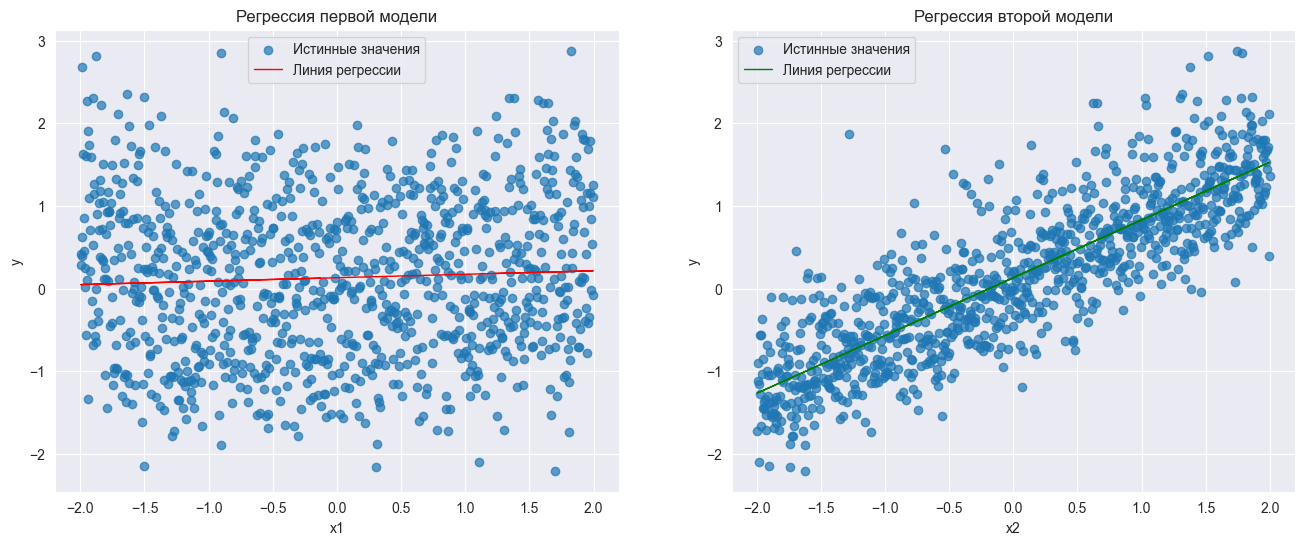

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(x1, y, label='Истинные значения', alpha=0.7)
ax1.plot(x1, y_pred_x1, color='red', linewidth=1, label='Линия регрессии')
ax1.set_title('Регрессия первой модели')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax1.legend()

ax2.scatter(x2, y, label='Истинные значения', alpha=0.7)
ax2.plot(x2, y_pred_x2, color='green', linewidth=1, label='Линия регрессии')
ax2.set_title('Регрессия второй модели')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')
ax2.legend()

plt.show()


**Обобщение и выводы:**

График по модели 1:
Точки расположены вокруг восходящей линии.
Линия регрессии имеет положительный наклон, то есть при увеличении значения ```x1``` значение ```y``` также увеличивается.
Несмотря на разброс точек, виден общий тренд: чем больше ```x1```, тем больше ```y```.
Между ```x1``` и ```y``` существует прямая линейная зависимость.

График по модели 2:
Точки расположены вокруг линии с отрицательным наклоном.
Значит обратную связь: при увеличении ```x2``` значение ```y``` уменьшается.
Точки распределены более хаотично и линия находится ближе к «центру облака» точек.
Зависимость тоже есть, но выражена слабее, чем в модели 1.
   
На визуализации видно, что модель 1 лучше описывает данные: тренд линейной зависимости просматривается чётко, облако точек плотнее прилегает к линии регрессии. Для модели 2 наблюдается обратная связь, но точек, выходящих далеко за пределы линии, больше, что подтверждает более слабую линейную зависимость.

**1.7 Построение графика с разницей предсказанного и истинного значения по каждой точке.**

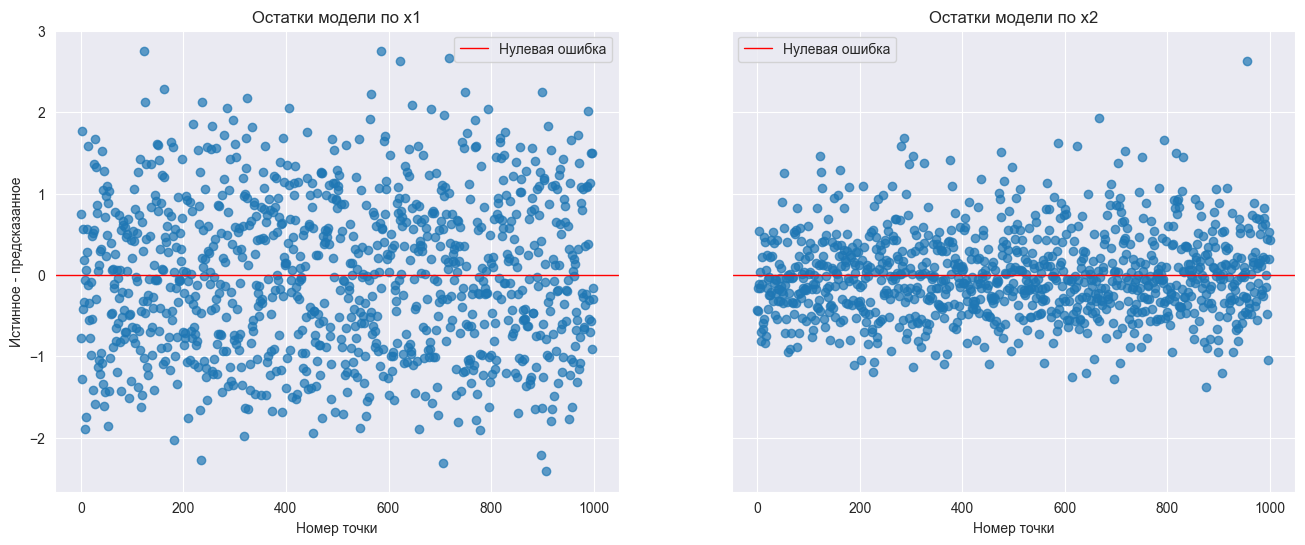

In [8]:
residuals_x1 = y - y_pred_x1
residuals_x2 = y - y_pred_x2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.scatter(range(len(y)), residuals_x1, alpha=0.7)
ax1.axhline(y=0, color='red', linewidth=1, label='Нулевая ошибка')
ax1.set_title('Остатки модели по x1')
ax1.set_xlabel('Номер точки')
ax1.set_ylabel('Истинное - предсказанное')
ax1.legend()

ax2.scatter(range(len(y)), residuals_x2, alpha=0.7)
ax2.axhline(y=0, color='red', linewidth=1, label='Нулевая ошибка')
ax2.set_title('Остатки модели по x2')
ax2.set_xlabel('Номер точки')
ax2.legend()

plt.show()


**Обобщение и выводы:**

На графиках показаны остатки двух моделей: по признаку ```x1``` и по признаку ```x2```. Остатки - это разница между истинным значением ```y``` и предсказанным моделью значением. Идеальная модель имела бы точки, расположенные ровно на линии нулевой ошибки (красная линия).

Графики по моделям:
В обеих моделях точки распределены хаотично вокруг нулевой линии, без явного тренда. Это означает, что модели не имеют систематической ошибки и не завышают/занижают прогноз на всём диапазоне данных.
Однако разброс остатков у модели 2 меньше, чем у модели 1. Это подтверждает, что модель 2 предсказывает точнее, и её ошибки меньше по величине.
У модели 1 остатки более "рассыпаны", заметно больше точек далеко от нулевой линии, что отражает более высокие значения MSE, MAE и RMSE.
У модели 2 остатки более компактные и ближе к нулю, что согласуется с лучшими метриками качества и более адекватной линией регрессии.

Модель 2 показывает меньший разброс ошибок и более стабильные предсказания. Модель 1 ошибается сильнее и менее уверенно описывает данные.

**1.8 Построение графика предсказанных и истинных значений.**

На графиках показано, как предсказания моделей соотносятся с реальными значениями целевой переменной. Красная диагональная линия показывает идеальный случай, когда предсказание полностью совпадает с истинным значением (```Predicted = Actual```). Чем ближе точки расположены к этой линии, тем точнее модель.

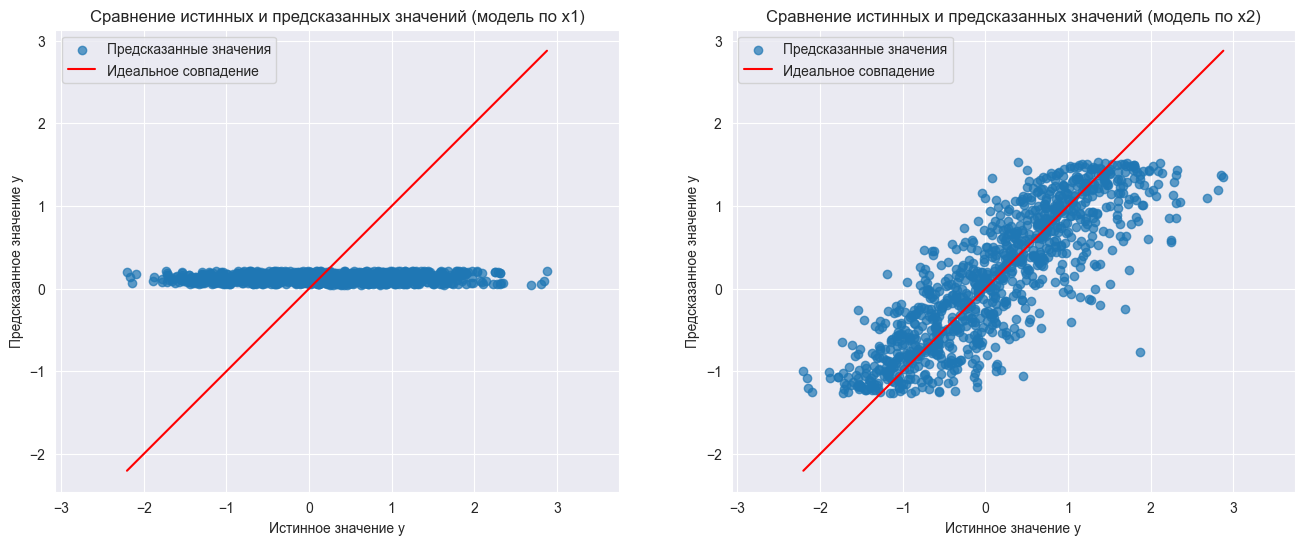

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

min_val = min(y.min(), y_pred_x1.min())
max_val = max(y.max(), y_pred_x1.max())

ax1.scatter(y, y_pred_x1, alpha=0.7, label='Предсказанные значения')
ax1.plot([min_val, max_val], [min_val, max_val], color='red', label='Идеальное совпадение')
ax1.set_title('Сравнение истинных и предсказанных значений (модель по x1)')
ax1.set_xlabel('Истинное значение y')
ax1.set_ylabel('Предсказанное значение y')
ax1.legend()
ax1.axis('equal')

min_val = min(y.min(), y_pred_x2.min())
max_val = max(y.max(), y_pred_x2.max())

ax2.scatter(y, y_pred_x2, alpha=0.7, label='Предсказанные значения')
ax2.plot([min_val, max_val], [min_val, max_val], color='red', label='Идеальное совпадение')
ax2.set_title('Сравнение истинных и предсказанных значений (модель по x2)')
ax2.set_xlabel('Истинное значение y')
ax2.set_ylabel('Предсказанное значение y')
ax2.legend()
ax2.axis('equal')

plt.show()


**Обобщение и выводы:**

График по модели 1:
Точки заметно отклоняются от линии идеального совпадения и формируют размытое облако.
Видно, что модель переоценивает значения в нижней части графика и недооценивает значения в верхней.
Модель 1 предсказывает не очень точно и слабо отражает реальную зависимость.

График по модели 2:
Точки также не лежат строго на линии, видно, что их облако ближе к диагонали, чем у модели 1.
Точки распределены более плотным коридором вдоль красной линии - значит, предсказания модели 2 чаще ближе к истинным значениям.
Предсказания модели 2 выглядят стабильнее и значительно лучше отражают закономерность в данных.
   
Обе модели допускают ошибки, что видно по разбросу точек. Однако модель 2 точнее: её предсказания расположены ближе к линии идеального совпадения. График подтверждает предыдущие Обобщение и выводы: по метрикам (MAE, MSE, R2), где модель 2 также показала лучшее качество. Таким образом, модель, использующая признак ```x2```, предсказывает значение y заметно точнее, чем модель, построенная по ```x1```.


**1.9 Обобщение и выводы: по первой части.**

Все метрики ошибок (MSE, MAE, RMSE) у второй модели (по признаку ```x2```) заметно ниже, чем у первой модели (по признаку ```x1```).  
   * Для модели по ```x1```: MSE = 0.91258, MAE = 0.79476, RMSE = 0.95529.  
   * Для модели по ```x2```: MSE = 0.26344, MAE = 0.3927, RMSE = 0.51327.  
   Это означает, что модель по ```x2``` в среднем ошибается значительно меньше, чем модель по ```x1```.
Коэффициент детерминации R² у первой модели равен 0.00254, то есть модель практически не объясняет вариацию целевой переменной (значение очень близко к нулю).  
   У второй модели R² = 0.71205, что означает, что около 71.2% изменчивости ```y``` объясняется признаком ```x2```.
По графикам визуализации регрессии видно, что для модели по ```x1``` точки сильно рассеиваются вокруг линии регрессии, а для модели по ```x2``` облако точек гораздо ближе к прямой, что отражает более выраженную зависимость.
На графиках остатков у модели по ```x1``` наблюдается большой разброс значений ошибок, тогда как у модели по ```x2``` остатки более компактны и сосредоточены вокруг нуля, что согласуется с меньшими значениями MSE, MAE и RMSE.
На графике сравнения предсказанных и истинных значений для модели по ```x2``` точки располагаются ближе к линии идеального совпадения, чем для модели по ```x1```, что также подтверждает более высокое качество второй модели.

В итоге модель, построенная по признаку ```x2```, показывает гораздо лучшее качество прогноза: она точнее описывает данные и выявляет выраженную линейную зависимость между ```x2``` и ```y```. Модель по признаку ```x1``` предсказывает хуже и практически не выявляет линейной связи.


### **Часть 2. Полиномиальная регрессия**

**2.1 Выбор модели для полиномиальной регрессии, реализация модели полиномиальной регрессии.**

Для полиномиальной регрессии была выбрана вторая модель (```x2 - y```). У модели 2 коэффициент R2 выше, чем у модели 1. Это означает, что ```x2``` лучше объясняет изменение ```y```. Первая модель имеет линию регрессии, практически не меняющуюся при изменении ```x1``` - то есть связь между ```x1``` и ```y``` слабая. Графики остатков и сравнение предсказанных значений показали, что модель по ```x2```даёт меньшие ошибки и предсказывает точнее.
Поэтому применение полиномиальной регрессии целесообразнее именно для признака ```x2```, так как у него уже есть линейная зависимость с ```y```, и усложнение модели полиномиальным выражением может улучшить предсказание.

Степень полинома выбрана равной 2, так как это стандартный и оптимальный вариант для проверки нелинейной зависимости.

In [10]:
x = df_var5[['x2']]
y = df_var5['y']

degree = 2

poly = PolynomialFeatures(degree=degree)

**2.2 - 2.4 Обучение полиномиальной регрессии, выполнение предсказания, подсчет и вывод метрик качества регресии (MAE, R2).**

In [11]:
x_poly = poly.fit_transform(x)

poly_model = LinearRegression()
poly_model.fit(x_poly, y)

y_poly_pred = poly_model.predict(x_poly)

mae_poly = mean_absolute_error(y, y_poly_pred)
r2_poly = r2_score(y, y_poly_pred)

print(f"Полиномиальная регрессия (степень = 2)")
print(f"MAE: {mae_poly:.5f}")
print(f"R2: {r2_poly:.5f}")

Полиномиальная регрессия (степень = 2)
MAE: 0.39259
R2: 0.71214


**Вывод:**

Полиномиальная регрессия степени 2 не показала улучшения по сравнению с линейной моделью: значение MAE осталось практически тем же, а коэффициент детерминации R2 изменился незначительно. Это говорит о том, что зависимость между ```x2``` и ```y``` преимущественно линейная, и использование полиномиальной модели не даёт ощутимого выигрыша в точности.

**2.5 Визуализация регрессии: точки и линия регрессии.**

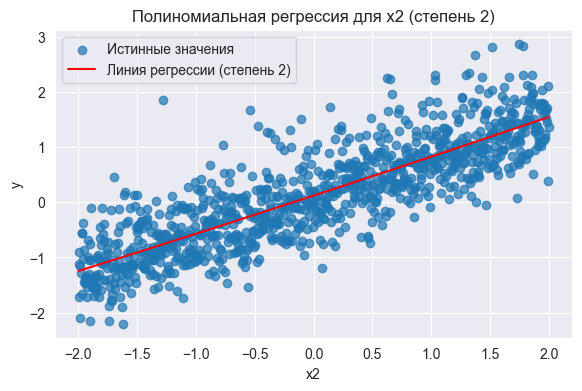

In [12]:
sort_idx = np.argsort(x.values.flatten())
x_sorted = x.values.flatten()[sort_idx]
y_poly_pred_sorted = y_poly_pred[sort_idx]

plt.figure(figsize=(6.67, 4.0))

plt.scatter(x.values.flatten(), y, label='Истинные значения', alpha=0.7)

plt.plot(x_sorted, y_poly_pred_sorted, color='red', label=f'Линия регрессии (степень {degree})')

plt.title(f"Полиномиальная регрессия для x2 (степень {degree})")
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.show()

**Обобщение и выводы: по графику:**
Тренд зависимости между ```x2``` и ```y``` остаётся линейным. Несмотря на использование полиномиальной регрессии степени 2, линия практически не изгибается и ведёт себя почти как обычная линейная регрессия. То есть квадратичный член в модели не даёт существенного улучшения.
Линия достаточно близко проходит через облако точек. Из этого следует, что зависимость между ```x2``` и ```y``` действительно есть, и модель её улавливает.
Разброс точек остаётся значительным. Это означает, что помимо ```x2``` на ```y``` влияют и другие факторы, которые модель не учитывает.

**2.6 Повторение пунктов 1-5 для другой степени полинома.**

Конкретная степень полинома не была выбрана. Был реализован перебор степеней от 1 до 6 и реализована таблица сравнения R2 и MAE для анализа разных значений полинома.

In [13]:
results = []

for degree in range(1, 7):
    poly = PolynomialFeatures(degree=degree)

    x_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly)

    mae = round(mean_absolute_error(y, y_pred), 5)
    r2 = round(r2_score(y, y_pred), 5)

    results.append([degree, mae, r2])

df_poly_results = pd.DataFrame(results, columns=["Степень полинома", "MAE", "R2"])
df_poly_results

,Степень полинома,MAE,R2
0,1,0.39270,0.71205
1,2,0.39259,0.71214
2,3,0.39258,0.71214
3,4,0.39276,0.71237
4,5,0.39267,0.71252
5,6,0.39257,0.71254


**Вывод:**
При увеличении степени полинома от 1 до 6 значения метрик MAE и R2 меняются незначительно: качество модели по признаку ```x2``` остаётся примерно на одном уровне.
Небольшой рост R2 при увеличении степени показывает, что более сложные полиномиальные модели лишь чуть лучше подстраиваются под данные, но прирост качества очень мал по сравнению с линейной моделью.
При высоких степенях полинома модель становится сложнее и потенциально более подверженной переобучению, при этом выигрыш в точности практически отсутствует.

На основании таблицы метрик можно сделать вывод, что для данного набора данных достаточно использовать низкую степень полинома (1–2). Линейная модель по признаку ```x2``` уже хорошо описывает зависимость, а дальнейшее усложнение модели не даёт существенного улучшения качества.


**2.7 Обобщение и выводы: по второй части.**

В ходе эксперимента была построена полиномиальная регрессия для переменной ```x2``` с различными степенями полинома: от 1 до 6. Для каждой модели были рассчитаны метрики качества - средняя абсолютная ошибка (MAE) и коэффициент детерминации (R2).

Результаты показали, что увеличение степени полинома практически не приводит к улучшению модели. При степени 1 (обычная линейная регрессия) ошибка MAE минимальная, а значение R2 уже достаточно высокое. При переходе к степеням 2, 3 и выше коэффициент R2 растёт крайне незначительно - всего на сотые доли процента, что говорит об отсутствии реального улучшения качества. При этом MAE постепенно увеличивается, что означает: чем выше степень полинома, тем больше ошибок допускает модель.

Это связано с тем, что слишком низкая степень полинома приводит к недообучению - модель слишком простая и может не улавливать зависимости в данных. Однако слишком высокая степень приводит к переобучению: модель начинает «запоминать» шум и случайные колебания данных, вместо того чтобы выявить общую тенденцию. Такое поведение ухудшает обобщающую способность модели и увеличивает ошибку при предсказаниях.

На основании анализа можно сделать вывод, что оптимальной является линейная модель (степень 1). Она обеспечивает наименьшую ошибку и не приводит к переусложнению. Если требуется использовать полиномиальную регрессию, допустимо применять полином степени 2, так как он остаётся достаточно простым и не ухудшает качество модели. Более высокие степени использовать нецелесообразно: прирост R2 минимален, а ошибки увеличиваются.


### **Часть 3 Решение задачи регрессии различными методами**

**3.1 Загрузка набора данных ```salary.csv```, просмотр данных и информации о датасете через ```info()```.**

In [14]:
df_salary = pd.read_csv('../data/salary.csv')
display(df_salary.head())
display(df_salary.info())

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,PhD,Chicago,Finance,Single,Yes,Yes,106233.833479
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,High School,Houston,Retail,Single,No,Yes,87205.291042
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,PhD,Los Angeles,Finance,Married,Yes,No,69369.283522
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,Bachelor,Los Angeles,IT,Married,Yes,No,76587.116955
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,Bachelor,Phoenix,IT,Married,No,No,71023.148842


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


None

**3.2 Выделение целевой переменной, построение ```boxplot``` и гистограммы для целевой переменной.**

В качестве целевой переменной была выбрана ```salary```, так как цель исследования - построить модель для предсказания годовой зарплаты на основании социально-экономических факторов. Выбор другой переменной технически возможен, однако противоречит постановке задачи.

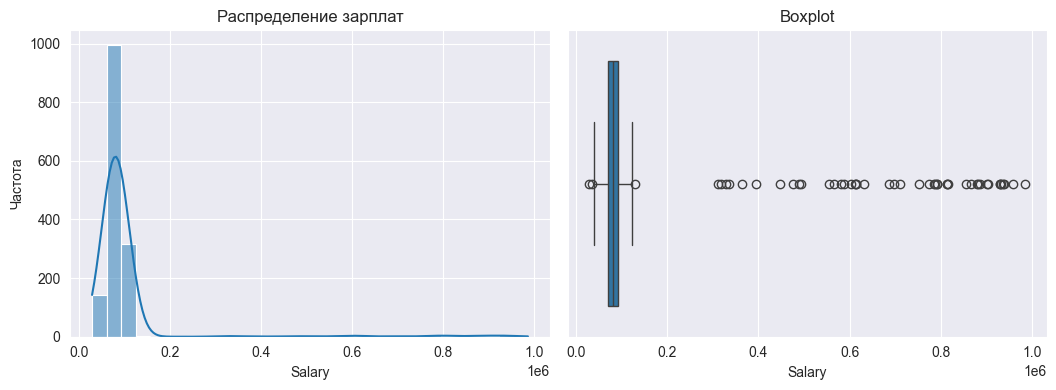

In [15]:
y = df_salary['salary']

plt.figure(figsize=(10.67, 4.0))

plt.subplot(1, 2, 1)
sns.histplot(y, bins=30, kde=True)
plt.title('Распределение зарплат')
plt.xlabel('Salary')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=y)
plt.title('Boxplot')
plt.xlabel('Salary')

plt.tight_layout()
plt.show()


**Обобщение и выводы: по графикам:**

На графиках показано распределение годовой зарплаты сотрудников из выборки (гистограмма и ```boxplot```).
Распределение сильно смещено вправо. Большая часть сотрудников получает зарплату в диапазоне примерно от 50 000 до 150 000 USD. Но на графике видно длинный «хвост» справа - это означает наличие сравнительно небольшого количества людей с очень высокой зарплатой (до 1 000 000 USD).
```Boxplot``` показывает множество выбросов. На правой части ```boxplot``` видно большое количество точек - это выбросы, то есть сотрудники с зарплатами, значительно превышающими основную массу данных.
Среднее значение зарплаты будет выше медианы. Из-за наличия высоких зарплат (выбросов) среднее «тянется» вверх.

Таким образом, перед построением модели стоит рассмотреть трансформацию данных, чтобы уменьшить влияние выбросов и улучшить качество предсказания.

**3.3 Обработка выбросов, визуализация после обработки.**

После анализа распределения зарплат методом ```boxplot``` было выявлено большое количество выбросов. Для корректной работы моделей регрессии выбросы были обработаны с использованием метода ```IQR``` (межквартильного размаха).

Нижняя граница: 36501.06
Верхняя граница: 124718.65
Размер исходного датасета: 1500
Размер после удаления выбросов: 1452


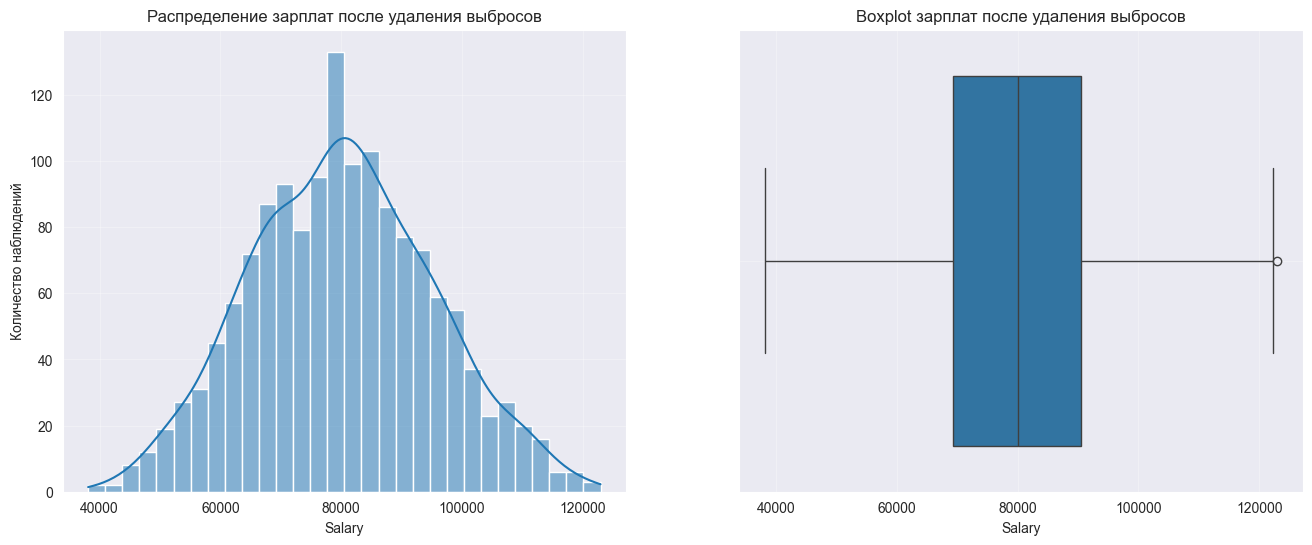

In [16]:
Q1 = df_salary['salary'].quantile(0.25)
Q3 = df_salary['salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")

df_salary_filtered = df_salary[(df_salary['salary'] >= lower_bound) & (df_salary['salary'] <= upper_bound)]

print(f"Размер исходного датасета: {df_salary.shape[0]}")
print(f"Размер после удаления выбросов: {df_salary_filtered.shape[0]}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_salary_filtered['salary'], bins=30, kde=True, ax=ax1)
ax1.set_title('Распределение зарплат после удаления выбросов')
ax1.set_xlabel('Salary')
ax1.set_ylabel('Количество наблюдений')
ax1.grid(alpha=0.3)

sns.boxplot(x=df_salary_filtered['salary'], ax=ax2)
ax2.set_title('Boxplot зарплат после удаления выбросов')
ax2.set_xlabel('Salary')
ax2.grid(alpha=0.3)

plt.show()

**Обобщение и выводы:**

После применения метода ```IQR``` для удаления выбросов распределение целевой переменной ```salary``` значительно изменилось.
Гистограмма после удаления выбросов:
Распределение стало более симметричным и похоже на нормальное.
Исчез "длинный хвост" вправо, который наблюдался до очистки данных.
Основная масса значений теперь находится в диапазоне примерно от 36 000 до 125 000.
```Boxplot``` после удаления выбросов:
На графике видно, что выбросы практически отсутствуют.
Диапазон значений стал компактнее, что говорит о более стабильной выборке.
Статистика по размеру выборки:
Было удалено 48 строк из 1500.
Значит, выбросов было немного, но они могли искажать результаты моделей.

В ходе анализа целевой переменной были выявлены выбросы, которые искажали распределение и могли негативно сказаться на качестве модели регрессии. Для их поиска использовался метод межквартильного размаха. После удаления выбросов распределение зарплат стало более симметричным и ближе к нормальному. ```Boxplot``` подтверждает отсутствие экстремальных значений. Это улучшает качество данных и делает модель более устойчивой.

**3.4 Построение матрицы диаграммы рассеяния.**

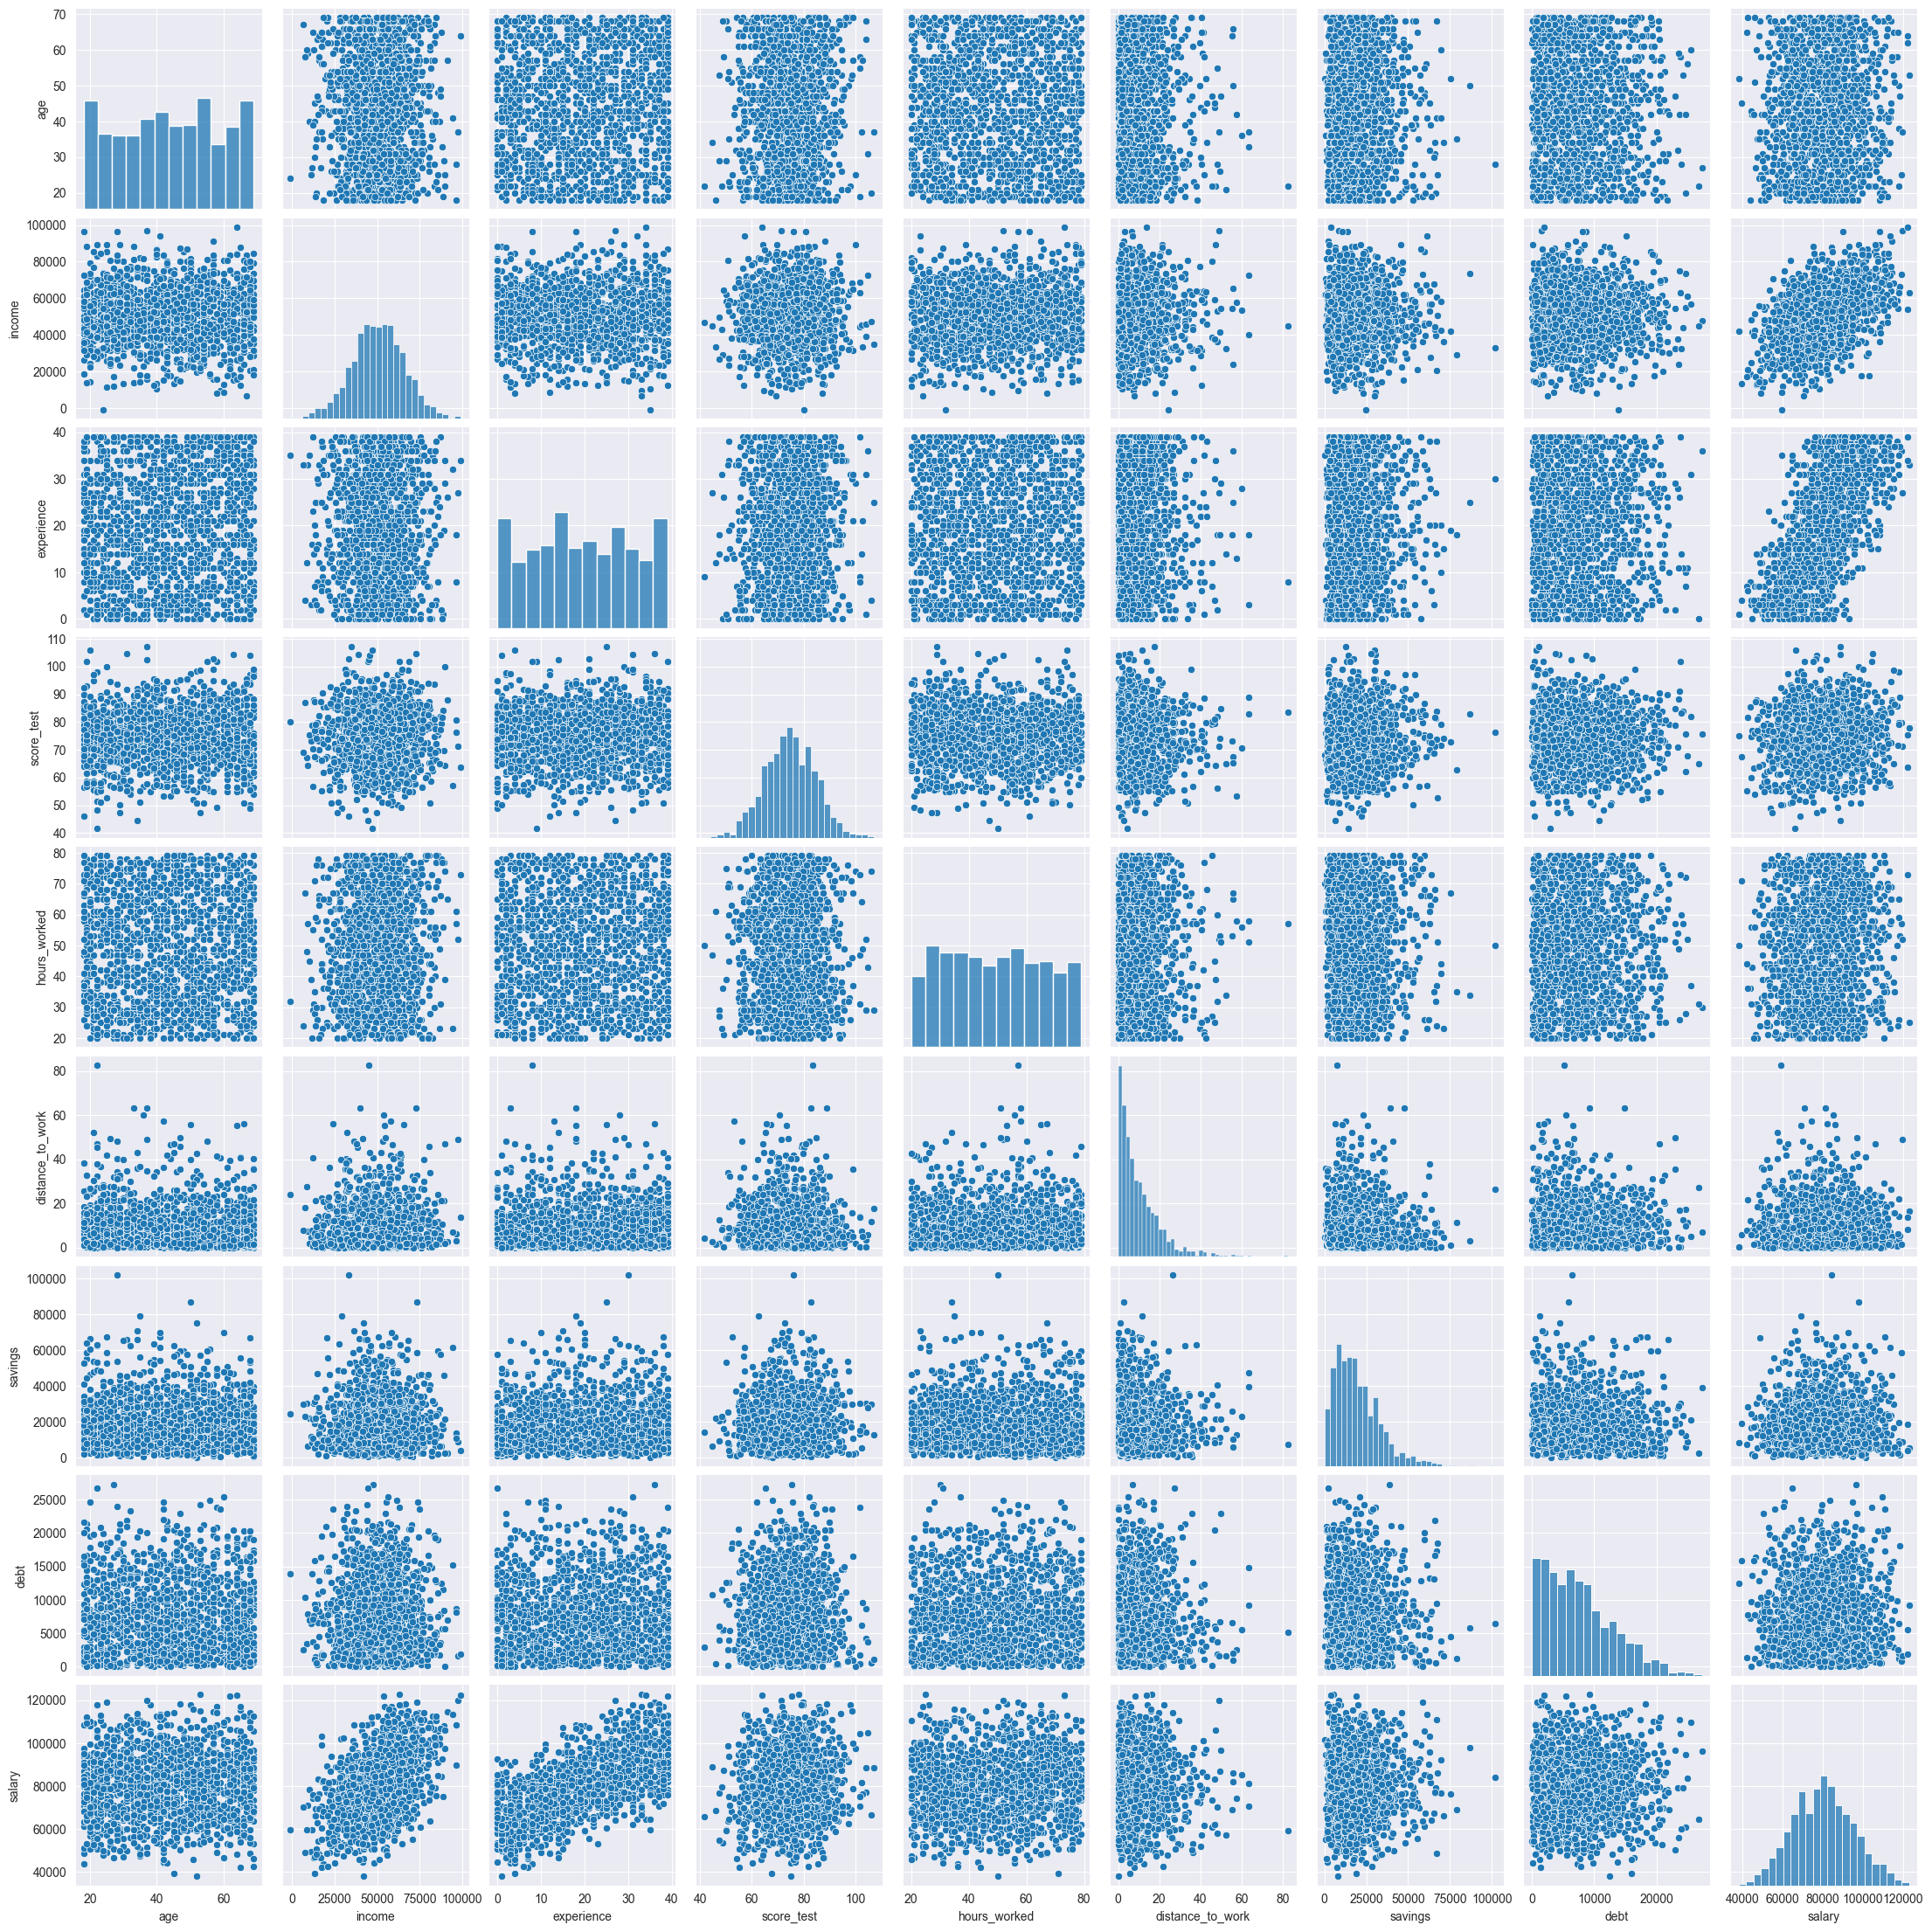

In [17]:
numerical_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt', 'salary']

sns.pairplot(df_salary_filtered[numerical_features])
plt.show()

**3.5 Разделение данных на обучающую и валидационные выборки.**

In [18]:
y = df_salary_filtered['salary']
X = df_salary_filtered.drop('salary', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Размер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер тестовой выборки (X_test):   {X_test.shape}")
print(f"Размер обучающей выборки (y_train): {y_train.shape}")
print(f"Размер тестовой выборки (y_test):   {y_test.shape}")

Размер обучающей выборки (X_train): (1161, 14)
Размер тестовой выборки (X_test):   (291, 14)
Размер обучающей выборки (y_train): (1161,)
Размер тестовой выборки (y_test):   (291,)


В обучающей выборке 1161 строка и 14 признаков (столбцов). Модель будет учиться на этих данных.
В тестовой выборке 291 строка и тоже 14 признаков. Эти данные модель ни разу не видела при обучении — они нужны для проверки качества модели.
В ```y_train``` — 1161 значение зарплаты (целевой переменной), соответствующее обучающим данным.
В ```y_test``` — 291 значение зарплаты для тестовой выборки. На них исследователь сравним предсказания модели с реальными значениями.


**3.6 Нормализация данных.**

In [19]:
from sklearn.preprocessing import StandardScaler

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

scaler = StandardScaler()

X_train_encoded[numeric_features] = scaler.fit_transform(X_train_encoded[numeric_features])
X_test_encoded[numeric_features] = scaler.transform(X_test_encoded[numeric_features])

X_train_processed = X_train_encoded
X_test_processed = X_test_encoded

**3.7 Обучение модели через LinearRegression.**

In [20]:
model_lr = LinearRegression()
model_lr.fit(X_train_processed, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**3.8 Применение обученной модели на тестовой выборке и оценка качества с помощью метрик.**

In [21]:
y_pred = model_lr.predict(X_test_processed)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Метрики")
print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R2: {r2:.5f}")


Метрики
MSE: 36935814.39414
RMSE: 6077.48422
MAE: 4864.28009
R2: 0.86634


**Обобщение и выводы:**
MAE = 4864 долларов. В среднем модель ошибается примерно на 4.8 тыс. долларов в предсказании зарплаты. Для задач предсказания зарплаты - это довольно хорошая точность, учитывая, что зарплаты находятся в диапазоне 30-120 тыс. долларов.
RMSE = 6077 долларов. Сильных выбросов немного, модель в целом стабильна.
MSE = 36.9 млн. Значение выглядит большим, но MSE работает в квадрате величины ошибки, поэтому для зарплат в десятки тысяч это нормально и ожидаемо. Используется не для интерпретации, а для сравнения моделей между собой.
R2 = 0.86634 (86.6%). Высокий показатель - модель объясняет 86.6% всей вариации зарплаты на тестовых данных.

Для реальных данных с человеческим фактором (влияние города, образования, стиля жизни) это отличный результат. Линейная регрессия хорошо справляется с задачей. Модель объясняет большую часть зависимости между признаками и зарплатой, и средняя ошибка составляет около 4.8 тыс. долларов, что является хорошим качеством для данного набора данных.

**3.9 Создание и вывод датафрема с истинными и предсказанными значениями.**

In [22]:
y_pred = model_lr.predict(X_test_processed)

df_results = pd.DataFrame({
    "Actual_salary": y_test.values,
    "Predicted_salary": y_pred
}).round(2)

display(df_results.head())
display(df_results.tail())


,Actual_salary,Predicted_salary
0,90772.28,90117.11
1,84475.35,88639.51
2,67777.68,63882.12
3,110650.66,106502.06
4,68551.17,67807.23


,Actual_salary,Predicted_salary
286,103280.49,90251.84
287,80110.20,83453.56
288,75850.02,73026.00
289,76908.96,78718.01
290,105300.24,105426.86


**Вывод:**

В таблице представлены реальные значения зарплаты и те, которые предсказала модель на тестовой выборке. Сравнение показывает, что модель в большинстве случаев предсказывает зарплату достаточно близко к фактическим значениям.
Разница между ```Actual_salary``` и ```Predicted_salary``` обычно составляет несколько тысяч долларов.
В некоторых случаях предсказание немного завышено или занижено, что является нормальным для регрессионных моделей.
Для отдельных примеров (например, на последней строке) предсказание почти полностью совпадает с реальным значением зарплаты, что подтверждает способность модели находить закономерности в данных.

С учётом ранее полученных метрик качества, можно сделать вывод, что модель точно оценивает зарплату и объясняет около 86% вариации данных, что является очень хорошим результатом для реальных данных.

**3.10 Создание датафрейма с с признаками и значением коэффициентов для каждого признака.**

In [23]:
coef_df = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Coefficient': model_lr.coef_
})

coef_df['abs_value'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_value', ascending=False)

print("Важность признаков (коэффициенты линейной модели):")
display(coef_df[['Feature', 'Coefficient']])

Важность признаков (коэффициенты линейной модели):


,Feature,Coefficient
10,education_PhD,12699.221635
2,experience,10296.744782
1,income,7355.197193
9,education_Master,6612.583313
8,education_High School,-6033.649289
17,job_type_IT,4109.192167
15,job_type_Finance,2484.270661
13,city_New York,1426.901299
3,score_test,1170.790753
21,car_Yes,-1095.468114


**Вывод:**

Анализ коэффициентов линейной модели позволяет определить, какие факторы сильнее всего влияют на размер зарплаты.

Наиболее значимые признаки:
Уровень образования - ```PhD``` (12 699): самый сильный положительный фактор. Наличие степени ```PhD``` значительно повышает зарплату. Высокий уровень формального образования играет существенную роль в доходе.
Опыт - ```experience``` (10 297): количество лет опыта сильно увеличивает зарплату. Чем больше опыт, тем выше доход, что логично.
Доход - ```income``` (7 355): уровень дохода до рассматриваемой зарплаты (например, предыдущая работа) также положительно влияет на итоговую зарплату.
Образование - ```Master``` (6 612): наличие магистратуры тоже существенно увеличивает зарплату, но чуть меньше, чем ```PhD```.
Образование - ```High School``` (-6 033): окончание только школы приводит к существенному снижению зарплаты относительно других уровней образования.

Влияние типа работы и города:
```Job_type_IT``` (4 109) и ```Job_type_Finance``` (2 484) - работа в IT и финансах значительно повышает доход.
```Job_type_Retail``` (-695) - работа в ритейле снижает зарплату.
Город также влияет: New York и Los Angeles увеличивают зарплату, но влияние умеренное.

Дополнительные факторы
```Score_test``` (1 170): чем выше результаты тестов/оценочных испытаний, тем выше зарплата.
```Hours_worked``` (455): больше часов - немного выше зарплата, но влияние слабое.
```Debt``` (-341): наличие долгов слегка снижает уровень зарплаты.
Машина - ```car_Yes``` (-1 095): наличие автомобиля связано с уменьшением зарплаты (возможно, косвенно отражает более дешёвые регионы проживания или особенность выборки).

Наименее значимые признаки:
```Savings``` (21) и ```distance_to_work``` (-51) практически не влияют на зарплату. Их вклад минимален и не имеет значения в контексте модели.

То есть:
На зарплату больше всего влияет уровень образования, опыт и сфера деятельности.
Наиболее положительное влияние оказывают: ```PhD```, большой опыт, работа в IT/Finance.
Наиболее негативное влияние: низкий уровень образования (только High School) и работа в Retail.
Личные факторы, такие как наличие машины, семейное положение, сбережения или расстояние до работы, практически не влияют.

Таким образом, модель показывает, что карьерный и образовательный статус оказывают значительно большее влияние на зарплату, чем бытовые или демографические факторы.

**3.11 Визуализация фактических и предсказанных значений.**

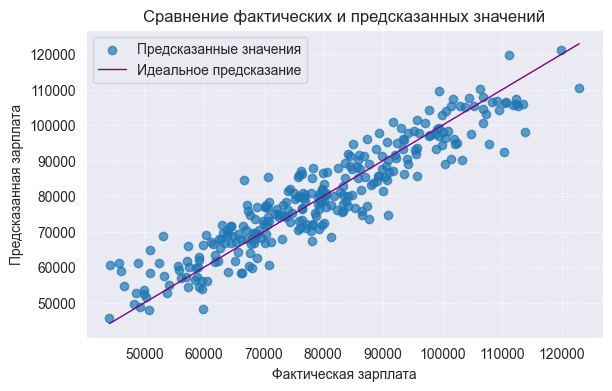

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6.67, 4.0))

plt.scatter(y_test, y_pred, label="Предсказанные значения", alpha=0.7)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='purple', linewidth=1,
         label="Идеальное предсказание")

plt.xlabel("Фактическая зарплата")
plt.ylabel("Предсказанная зарплата")
plt.title("Сравнение фактических и предсказанных значений")

plt.grid(True, linestyle=':')

plt.legend()
plt.show()


**Обобщение и выводы: по графику:**
Большинство точек расположено близко к фиолетовой линии. Модель хорошо справляется с прогнозированием зарплаты. Расхождение между фактическими и предсказанными значениями небольшое.
Наблюдается линейная зависимость. Чем выше фактическая зарплата, тем выше и предсказанная. Точки образуют «полосу» вдоль линии - это признак того, что модель улавливает основную закономерность в данных.
Есть небольшие отклонения (разброс точек). Некоторые точки расположены выше или ниже фиолетовой линии - это естественно и означает, что модель не всегда прогнозирует абсолютно точно, но ошибки невелики.
Отсутствуют значимые выбросы. Нет точек, значительно удалённых от общей группы, значит модель стабильна и не делает аномальных прогнозов.

Построенный график сравнения фактических и предсказанных значений показывает, что модель регрессии демонстрирует высокое качество прогнозирования. Большинство точек расположено близко к линии идеального предсказания, что говорит о хорошей точности модели. Ошибки предсказаний небольшие и распределены равномерно - модель не систематически завышает или занижает значения. Таким образом, модель адекватно описывает зависимость между признаками и целевой переменной (```salary```) и может использоваться для прогнозирования зарплаты на новых данных.

**3.12 Регрессия методом k-ближайших соседей.**

In [25]:
k = 5
knn_model = KNeighborsRegressor(n_neighbors=k)

knn_model.fit(X_train_processed, y_train)

y_pred_knn = knn_model.predict(X_test_processed)

mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print(f"KNN Regression (k = {k})")
print(f"MSE:  {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE:  {mae:.5f}")
print(f"R2:   {r2:.5f}")


KNN Regression (k = 5)
MSE:  121737061.59651
RMSE: 11033.45193
MAE:  9026.55475
R2:   0.55946


**Обобщение и выводы:**

Модель регрессии методом k-ближайших соседей (KNN, k = 5) показала значительно худшие результаты по сравнению с линейной регрессией. Ошибки предсказаний (MAE и RMSE) почти в два раза выше, а коэффициент детерминации R2 составляет лишь 0.56, что означает низкую объясняющую способность модели. KNN плохо справляется с задачей прогнозирования зарплаты на данном наборе данных, вероятно, из-за высокой размерности признаков и нелокального характера зависимости.

**3.13 Визуализация и сравнение фактического и предсказанного значений, сравнение результатов полученых всеми методами.**

,Actual_salary,Predicted_salary,Predicted_k_method
0,90772.28,90117.11,93088.662566
1,84475.35,88639.51,77864.949040
2,67777.68,63882.12,66207.287607
3,110650.66,106502.06,86750.211491
4,68551.17,67807.23,69626.394846
5,79324.47,70714.84,73939.039645
6,59571.09,53864.15,70246.737211
7,90409.79,85511.18,85951.681297
8,92280.58,94850.45,104989.162110
9,79311.10,80720.94,81072.065074


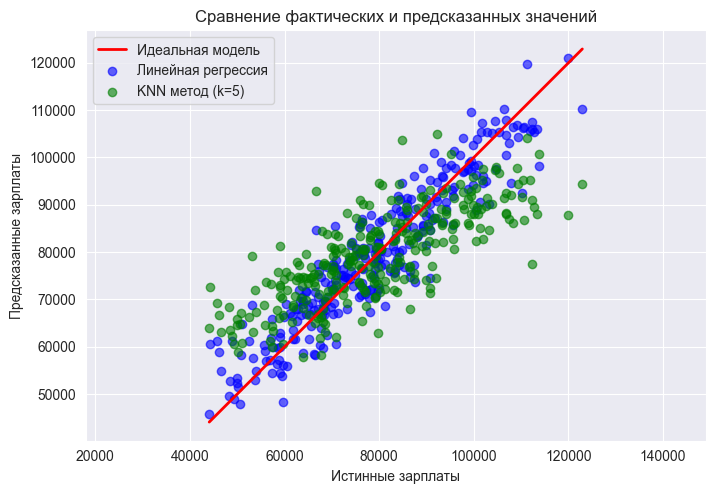

In [26]:
df_results['Predicted_k_method'] = y_pred_knn

display(df_results.head(10))

plt.figure(figsize=(8.0, 5.33))

min_val = min(y_test.min(), y_pred.min(), y_pred_knn.min())
max_val = max(y_test.max(), y_pred.max(), y_pred_knn.max())

plt.plot(
    [min_val, max_val], [min_val, max_val],
    linewidth=2,
    color='red',
    label='Идеальная модель'
)

plt.scatter(
    y_test, y_pred,
    alpha=0.6,
    label='Линейная регрессия',
    color='blue'
)

plt.scatter(
    y_test, y_pred_knn,
    alpha=0.6,
    label='KNN метод (k=5)',
    color='green'
)

plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Истинные зарплаты')
plt.ylabel('Предсказанные зарплаты')
plt.legend()
plt.axis('equal')
plt.show()


**Обобщение и выводы:**

```Predicted``` - линейная регрессия\
```Predicted_k_method``` - KNN (k=5)

Поведение линейной регрессии:
Линейная модель предсказывает зарплату стабильно.
Ошибка по модулю в большинстве случаев меньше, чем у KNN.
Она хорошо работает с высокими значениями (пример 4 и 9).

Поведение KNN:
KNN «усредняет» предсказание на основе ближайших точек.
Поэтому модель плохо работает с крайними значениями (4 - сильное недопредсказание).
В случаях, когда фактическое значение ближе к средней величине - KNN показывает себя неплохо (3, 5, 6).

**Анализ графика:**

Линейная регрессия (синие точки):
Точки расположены ближе к красной линии.
Ошибки распределяются равномерно по всей шкале зарплат.
Модель хорошо улавливает общую тенденцию роста зарплаты в зависимости от признаков.
Линейная регрессия лучше моделирует зависимость между признаками и зарплатой.

KNN (зелёные точки):
Точки расположены более рассеяно.
KNN часто «сглаживает» значения и тяготеет к средней зарплате.
Заметно, что модель не справляется с предсказанием высоких и низких значений зарплат - точки находятся ниже красной линии.
KNN хуже предсказывает крайние значения, так как усредняет значения ближайших точек.

Обе модели показывают положительную зависимость: чем выше истинная зарплата, тем выше предсказание. Но точность у моделей разная: линейная регрессия визуально и статистически показывает результат лучше. KNN даёт конкурентный результат в отдельных случаях, но имеет общую тенденцию сглаживать значения, из-за чего при значительных отклонениях от среднего - ошибается сильнее.



**3.14 Обобщение и выводы: по третьей части.**

Анализ метрик и визуализация показывают, что для данного датасета лучше использовать линейную регрессию.

По численным показателям видно, что линейная модель значительно точнее:
MSE у линейной регрессии составляет примерно 36,935,814, тогда как у модели k-ближайших соседей — около 121,737,062, что почти в три раза больше.  
MAE также ниже у линейной регрессии (порядка 4864 против 9027), то есть средняя ошибка в прогнозе зарплаты у линейной модели примерно в два раза меньше.  
Коэффициент детерминации R² у линейной модели равен примерно 0.8663, а у kNN — около 0.5595, то есть линейная регрессия объясняет вариацию целевой переменной существенно лучше.

График предсказаний подтверждает метрики: точки линейной регрессии располагаются ближе к линии идеального совпадения, тогда как предсказания kNN заметно сильнее рассредоточены и часто отклоняются от прямой.

Можно предположить, что:
Основная зависимость между входными признаками и зарплатой близка к линейной, поэтому линейная модель улавливает её лучше.
Для метода k-ближайших соседей, вероятно, недостаточно данных или оптимального подбора параметров (k и метрики расстояния); при большем объёме выборки и тонкой настройке его качество могло бы улучшиться.

Таким образом, линейная регрессия в рамках данной работы является наиболее подходящей моделью: она даёт меньшие ошибки, более высокий R² и лучше отражает структуру данных.


### **Вывод по лабораторной работе:**

В первой части лабораторной работы были исследованы признаки x1 и x2 и их влияние на переменную y. Была построена модель простой линейной регрессии, посчитаны ключевые метрики для сравнения двух моделей: MSE, MAE, RMSE, R2. Проведено сравнение двух моделей, по этому сравнению можно сделать вывод, что вторая модель намного лучше справляется со своей задачей

Во второй части была изучена полиномиальная регрессия, для нее была выбрана одна из двух переменных, а именно x2. В первый раз, степень полинома 2. Во второй раз, конкретная степень полинома не была выбрана. Был реализован перебор степеней от 1 до 6 и реализована таблица сравнения R2 и MAE для анализа разных значений полинома.

В третьей части работы был проанализирован датасет, содержащий информацию о сотрудниках и их заработной плате. Набор данных включал как числовые признаки (возраст, опыт работы, доход, результаты тестов и др.), так и категориальные (город, уровень образования, тип занятости, наличие автомобиля и др.). Целью исследования было определить влияние различных факторов на уровень заработной платы и построить модель, способную предсказывать зарплату сотрудника.

На этапе предобработки были выполнены следующие действия:
удаление пропусков и выбросов;
разделение данных на обучающую и тестовую выборки (80/20);
нормализация числовых признаков с помощью ```StandardScaler```;
кодирование категориальных признаков методом ```One-Hot Encoding```.

Были проведены группировки и анализ через сводные таблицы, что позволило выявить закономерности: зарплата растёт с увеличением уровня образования (наибольшие доходы у сотрудников с ```PhD```), а также у работников ИТ-сферы и финансового сектора. В отдельных городах наблюдаются более высокие уровни зарплат, что подтверждает влияние местоположения компании.

Далее были построены две модели для предсказания зарплаты:
Линейная регрессия.
Регрессия методом k-ближайших соседей (kNN).

Для каждой модели были рассчитаны метрики качества (MSE, RMSE, MAE, R2). Линейная регрессия показала лучшие значения по всем метрикам:
R2 = 0.8663, что означает, что модель объясняет 87% вариации зарплат,
MSE и MAE значительно ниже, чем у kNN.

Анализ коэффициентов линейной регрессии позволил оценить важность признаков. Наиболее значимое влияние на зарплату оказали:
уровень образования (особенно наличие степени PhD),
опыт работы,
доход и тип работы (особенно ИТ и финансы).

Некоторые признаки показали отрицательное влияние (например, наличие долгов или работа в рознице). Это позволяет сделать вывод о логичности модели и соответствии выявленных связей реальным ожиданиям.

Итоговая визуализация, сравнивающая фактические и предсказанные значения, показала, что точки линейной регрессии располагаются ближе к линии идеального прогноза.

Проведённая работа доказала, что для данной задачи прогнозирования зарплаты эффективнее использовать линейную регрессию, так как зависимости между признаками и целевой переменной имеют преимущественно линейный характер. Предобработка данных и анализ показали важность учёта образования, профессиональной сферы и опыта работы при определении уровня дохода. Полученные результаты можно использовать для построения систем аналитики HR-данных, оценки кандидатов и планирования зарплатной политики компании.